### Why use Decision Trees?
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

* Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* The decisions or the test are performed on the basis of features of the given dataset.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
* A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
* Decision Tree is a Supervised learning Technique that can be used for both problems i.e,
 #####  👉Classification
 
 #####  👉Regression
* The logic behind the decision tree can be easily understood because it shows a tree-like structure.
* Below diagram explains the general structure of a decision tree:

#### Decision Tree always work on NON LINEAR SPLITTING DATA

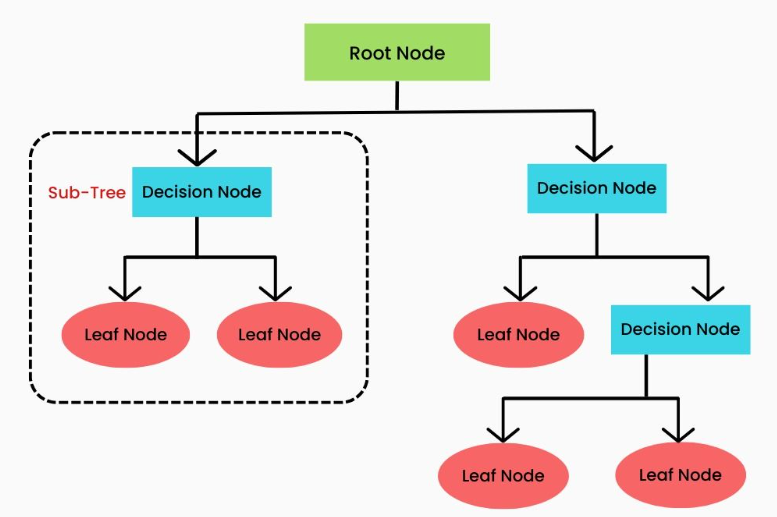

### Decision Tree Terminologies
👉Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
    
#### 👉Leaf Node: 
Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
    
#### 👉Splitting: 
Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.

#### 👉Branch/Sub Tree:
A tree formed by splitting the tree.

#### 👉Pruning:
Pruning is the process of removing the unwanted branches from the tree.

#### 👉Parent/Child node:
The root node of the tree is called the parent node, and other nodes are called the child nodes.

## Attribute Selection Measures
This measurement, we can easily select the best attribute for the nodes of the tree. 

#### These are most popular techniques for ASM, which are:


##### 1. Entropy
##### 2. Information Gain
##### 3. Gini Index

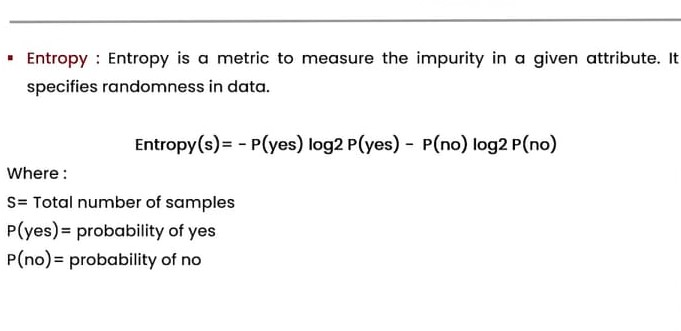

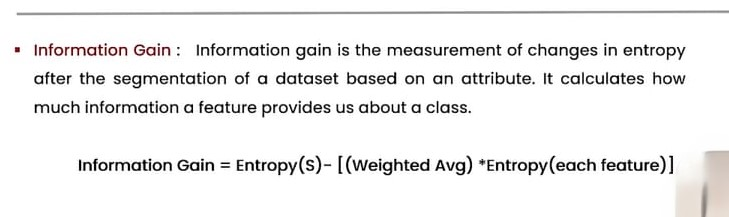

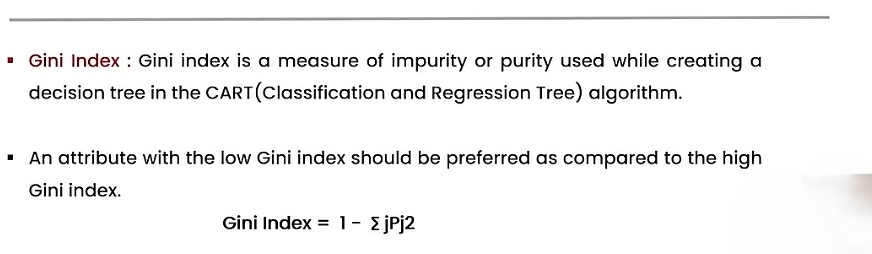

### Decision Tree (PRACTICAL)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('purchased_data.csv')
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


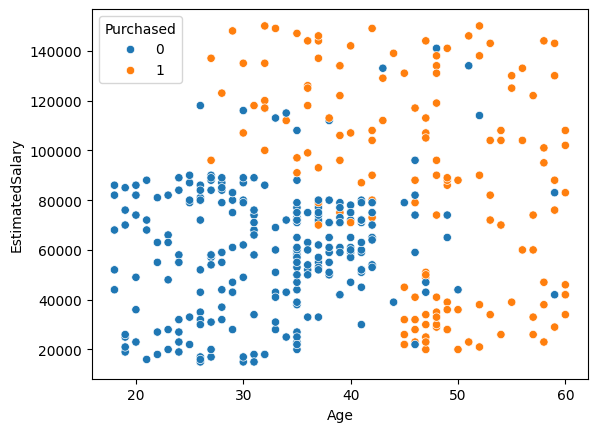

In [3]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=dataset,hue='Purchased')
plt.show()

In [4]:
# This graph is NON LINEAR SPLITTING GRAPH

In [5]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x= dataset.iloc[:,:-1]
y= dataset['Purchased']

In [7]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
sc.transform(x)

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [8]:
# converting into dataframe
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [9]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [10]:
# data is now scaled i.e, data is in a fixed range now

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Pre Pruining

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)    # Pre Pruining (max_depth will go 5 depth in a tree)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

### Checking training and testing accuracy

In [13]:
dt.score(x_train,y_train)*100

93.4375

In [14]:
dt.score(x_test,y_test)*100

90.0

##### Training accuarcy is higher than testing, our model is overfitted.
##### because it works on training very well with accuracy of 99% , but in testing it's accuracy decreases to 83% due to overfitting so in this case we hace to perform pruining to cut umwanted branches of our data in case to avoid overfitting.

In [15]:
dt.predict([[19,19000]])

C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [16]:
# wrong prediction

In [17]:
dt.predict([[48,41000]])

C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [18]:
# This is right prediction

### Graph Analysis of DECISION TREE

In [19]:
from sklearn.tree import plot_tree

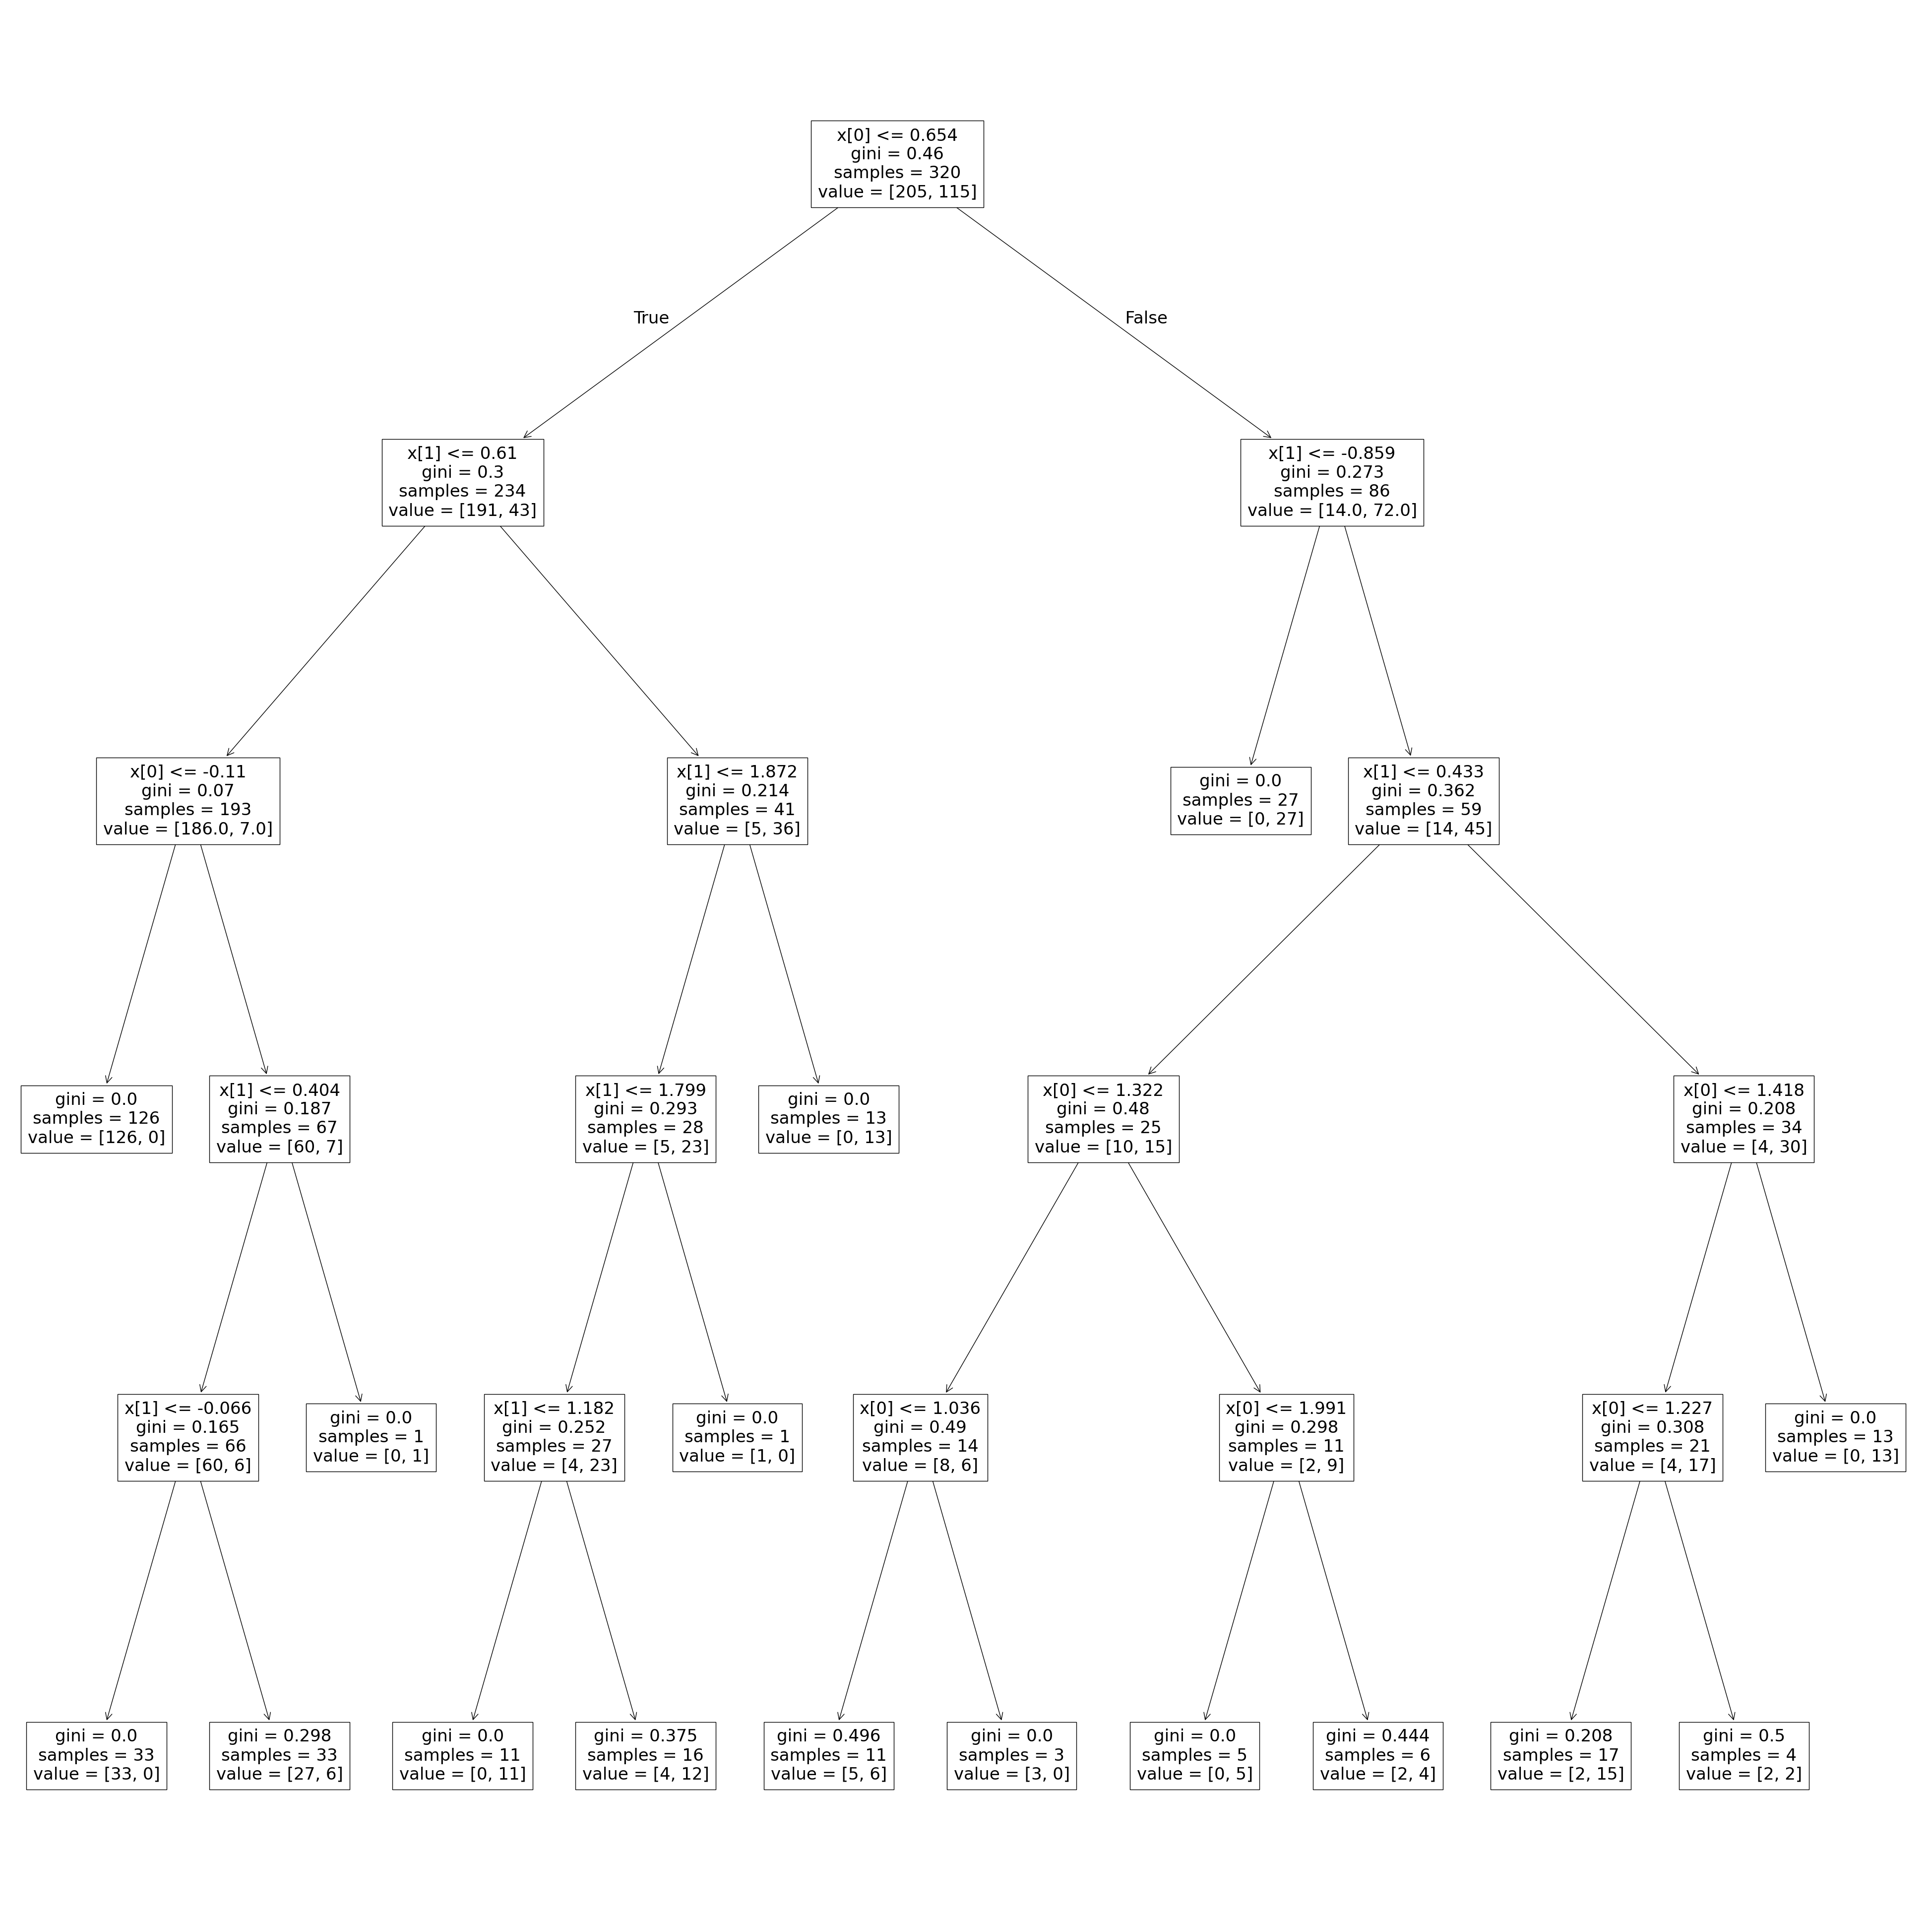

In [20]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig('demo.jpg')
plt.show()

C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

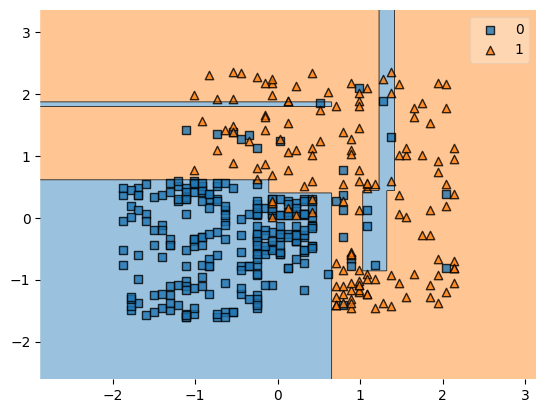

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show

### Post Pruining

In [22]:
for i in range(1,20):
    dt2 = dt = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)


0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.990625 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [23]:
# third position value of test and train is almost same 91
# third position having less difference as compared to all in training and testing
# So our depth will on 2 no.

In [24]:
dt2 = DecisionTreeClassifier(max_depth=3)   
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
dt2.score(x_train,y_train)*100

91.875

In [26]:
dt2.score(x_test,y_test)*100

91.25

#### model is perfectly trained now without any overfitting after applying pruining.

C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

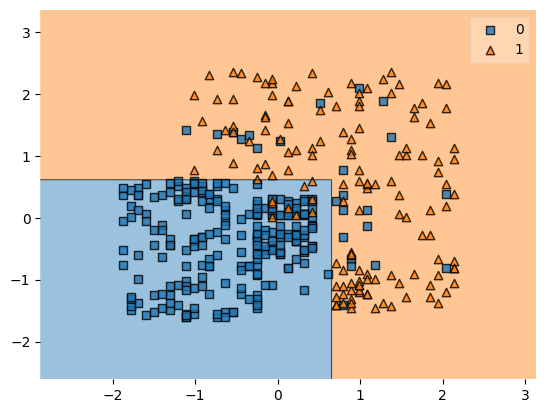

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt2)
plt.show

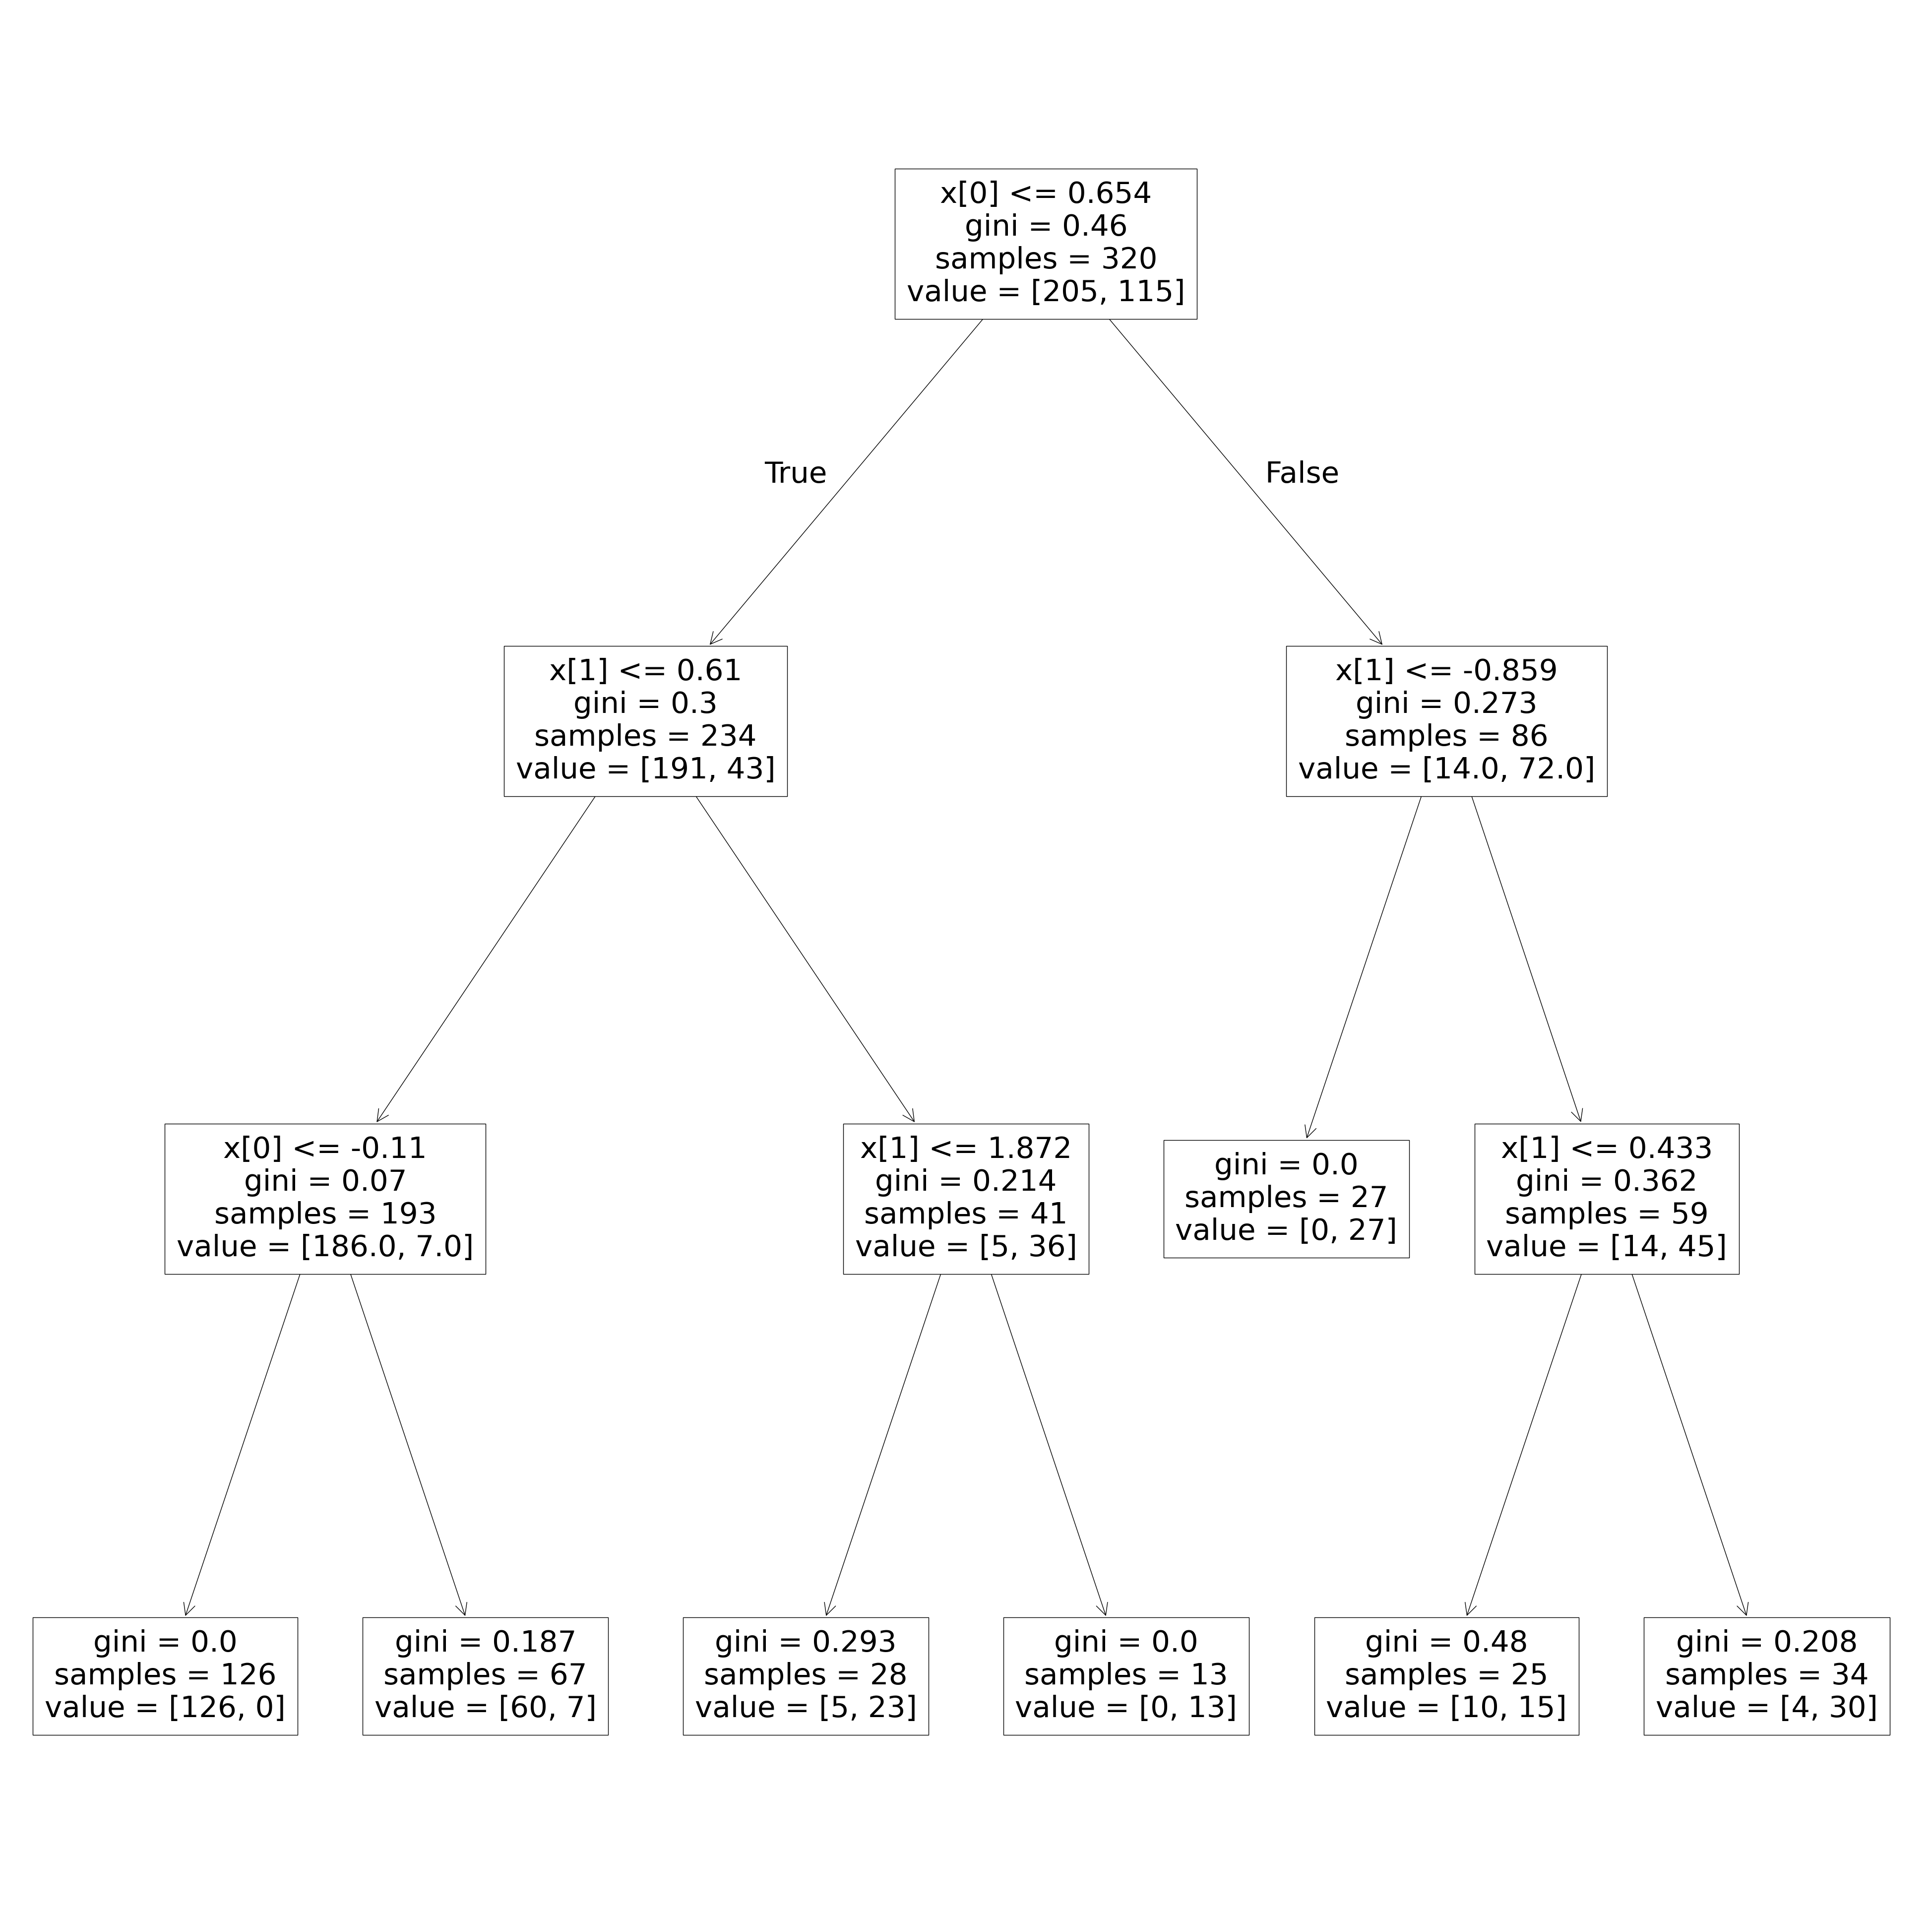

In [28]:
plt.figure(figsize=(50,50))
plot_tree(dt2)
plt.savefig('demo.jpg')
plt.show()

In [29]:
# 3 depth tree